### Putting It All Together Pt1 (Preparing a Dataset)


Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

Acknowledgements
The dataset is available on GitHub here.

Inspiration
Can you accurately predict insurance costs?

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### one hot encode categorical values

In [5]:
#first step is to convert categorical (object) columns to numerical
df_onehot = pd.get_dummies(df)
df_onehot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
df_onehot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

#### create X and y variables

In [7]:
X = df_onehot[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]

In [8]:
#also works like this
X = df_onehot.drop('charges', axis = 1)

In [9]:
y = df_onehot['charges']

In [10]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [11]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [12]:
X.shape

(1338, 11)

In [13]:
y.shape

(1338,)

#### create training and test set

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [16]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [17]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [18]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


#### Build a model

In [19]:
tf.random.set_seed(42)

In [29]:
#create the model
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(11))
insurance_model.add(tf.keras.layers.Dense(1))

In [30]:
#compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

In [64]:
#fit the model
history = insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 7269.4473 - mae: 7269.4473
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7037.6104 - mae: 7037.6104
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6979.5317 - mae: 6979.5317
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7364.3394 - mae: 7364.3394
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7165.4648 - mae: 7165.4648
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7149.1904 - mae: 7149.1904
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7191.2012 - mae: 7191.2012
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6984.6548 - mae: 6984.6548
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7192.0811 - mae: 7192.0811
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 6882.0845 - mae: 6882.0845

In [32]:
#check the model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7217.1201 - mae: 7217.1201


[7217.1201171875, 7217.1201171875]

with an mae of 7000, we can conclude that the model is, on average, $7000 off....
which is pretty shitty. especially considering the mean of y_train is 13346 and median
of y_train is 9575.

#### To improve a model there are 3 things you can:
1. Get more training data
2. Make your model larger
3. Train for longer

#### experiment 1: adding more layers and changing optimizer to adam

In [63]:
#set random seed
tf.random.set_seed(42)

#create the model
model2 = tf.keras.Sequential()
#model2.add(tf.keras.layers.Dense(100))
model2.add(tf.keras.layers.Dense(10))
model2.add(tf.keras.layers.Dense(1))

#compile the model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ['mae'])

#fit the model
history2 = model2.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13279.1016 - mae: 13279.1016
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12998.5508 - mae: 12998.5508
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12359.9570 - mae: 12359.9570
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 11267.7432 - mae: 11267.7432
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9902.3105 - mae: 9902.3105
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8626.2051 - mae: 8626.2051
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7781.4487 - mae: 7781.4487
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7492.3174 - mae: 7492.3174
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.4502 - mae: 7429.4502
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7404.6792 - mae: 7

In [43]:
model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5243.4272 - mae: 5243.4272


[5243.42724609375, 5243.42724609375]

#### experiment 2. same as above, just adding more epochs

In [62]:
#set random seed
tf.random.set_seed(42)

#create mdoel
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(100))
model3.add(tf.keras.layers.Dense(10))
model3.add(tf.keras.layers.Dense(1))

#compile the model
model3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

#fit the model
history3 = model3.fit(X_train, y_train, epochs = 200, verbose = 0)

In [46]:
model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7861 - mae: 3488.7861


[3488.7861328125, 3488.7861328125]

This is more of an imporvement still

#### experiment 3: adding several more layers with activation functions, changing the learning rate, and trianing for 200 epochs

In [60]:
#lets improve our model to make better guesses
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Dense(11, activation = 'relu'))
model4.add(tf.keras.layers.Dense(44, activation = 'relu'))
model4.add(tf.keras.layers.Dense(88, activation = 'relu'))
model4.add(tf.keras.layers.Dense(44, activation = 'relu'))
model4.add(tf.keras.layers.Dense(11, activation = 'relu'))
model4.add(tf.keras.layers.Dense(1))

model4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ['mae'])

history4 = model4.fit(X_train, y_train, epochs = 200, verbose = 0)

In [56]:
model4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1942.1740 - mae: 1942.1741


[1942.1739501953125, 1942.174072265625]

an mae of 2161 is better yet. perhaps increasing epochs and layers will get the value down even further.

Text(0.5, 0, 'epochs')

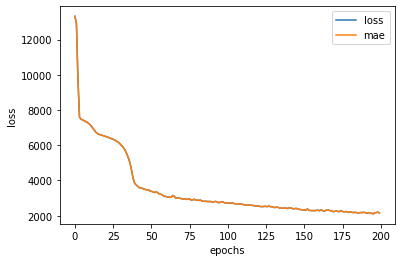

In [68]:
#we can also plot the loss/training curve of each model
pd.DataFrame(history4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

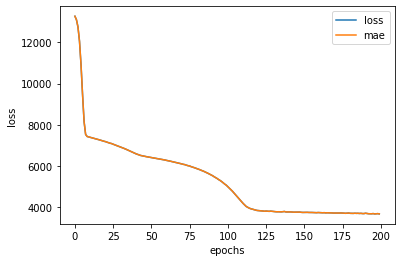

In [67]:
pd.DataFrame(history3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

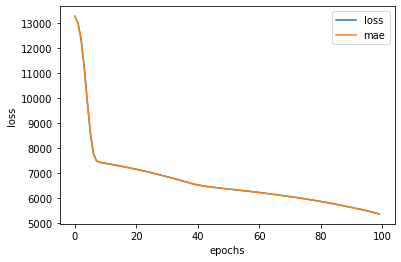

In [66]:
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

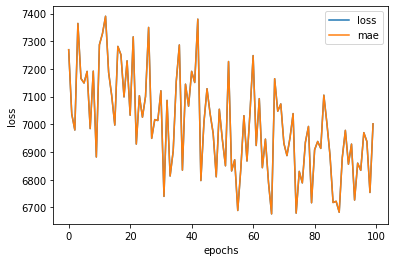

In [65]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

? How long should you train for?

It depends. really... it depends on the problem you're working on.
However, many people have asked this question before
Tensorflow 